# Iris

## Step 1: Preprocess the Data

In [0]:
import pandas as pd
x = pd.read_csv('iris.csv')

In [2]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [0]:
y = x.pop('species')

In [0]:
# y

In [0]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y = lb.fit_transform(y)

In [9]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [10]:
lb.classes_

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                 test_size=0.3,
                                                 random_state = 2020)

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Step 2: Build the NN Model

In [0]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Dense(50, activation='relu', input_shape=[4]))
model.add(Dense(100, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(3, activation='softmax'))

## Step 3: Compile Model

In [0]:
model.compile(
    loss='categorical_crossentropy', # measures difference between probability distribution
    optimizer='adam',
    metrics=['accuracy'])

## Step 4: Train Model

In [16]:
history = model.fit(x_train,y_train,
                    epochs=200, 
                    validation_split = 0.3)

Epoch 1/200
3/3 [==============================] - 0s 61ms/step - loss: 1.0886 - accuracy: 0.3151 - val_loss: 1.0252 - val_accuracy: 0.5938
Epoch 2/200
3/3 [==============================] - 0s 11ms/step - loss: 1.0259 - accuracy: 0.5616 - val_loss: 0.9812 - val_accuracy: 0.6250
Epoch 3/200
3/3 [==============================] - 0s 11ms/step - loss: 0.9975 - accuracy: 0.6575 - val_loss: 0.9344 - val_accuracy: 0.6250
Epoch 4/200
3/3 [==============================] - 0s 11ms/step - loss: 0.9420 - accuracy: 0.6575 - val_loss: 0.8879 - val_accuracy: 0.6250
Epoch 5/200
3/3 [==============================] - 0s 11ms/step - loss: 0.8950 - accuracy: 0.6575 - val_loss: 0.8423 - val_accuracy: 0.6250
Epoch 6/200
3/3 [==============================] - 0s 11ms/step - loss: 0.8656 - accuracy: 0.6575 - val_loss: 0.7972 - val_accuracy: 0.6250
Epoch 7/200
3/3 [==============================] - 0s 12ms/step - loss: 0.8072 - accuracy: 0.6575 - val_loss: 0.7557 - val_accuracy: 0.6250
Epoch 8/200
3/3 [===

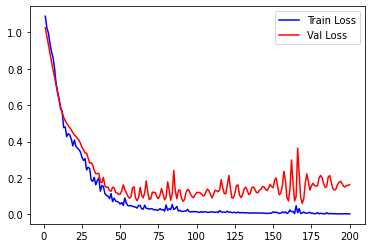

In [18]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)

plt.plot(epochs, loss,'b',label='Train Loss')
plt.plot(epochs, val_loss,'r',label='Val Loss')
plt.legend()
plt.show()

## Step 5: Evaluate Model

In [23]:
loss,accuracy = model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.2990 - accuracy: 0.8889


In [24]:
loss,accuracy

(0.29902613162994385, 0.8888888955116272)

## Step 6: Saving Model

In [0]:
model.save("iris.h5")

## Step 7: Load Model & Predict

In [0]:
record = [[5.1,3.5,1.4,0.2]]
scaled = sc.transform(record)

In [28]:
from tensorflow.keras.models import load_model
model = load_model('iris.h5')

In [0]:
y_pred = model.predict(scaled)

In [30]:
y_pred

array([[9.9999392e-01, 6.0649882e-06, 6.6476623e-16]], dtype=float32)

In [31]:
y_pred.argmax()

0

# Mnist

In [0]:
# Step 1:Load the Data
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [42]:
x_train.shape

(60000, 28, 28)

In [43]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [45]:
x_train.shape

(60000, 28, 28)

In [0]:
x_train = x_train/255
x_test = x_test/255

In [48]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [0]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [50]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
# Step 2: Build the Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential()
model.add(Flatten(input_shape=[28,28]))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [61]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_23 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_24 (Dense)             (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Step 3: Compile the Model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [64]:
# Step 4: Train the Model
history = model.fit(x_train,y_train,
          epochs=10,
          shuffle = True,
          validation_split = 0.3)

Epoch 1/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.3410 - accuracy: 0.9003 - val_loss: 0.2134 - val_accuracy: 0.9378
Epoch 2/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1599 - accuracy: 0.9522 - val_loss: 0.1523 - val_accuracy: 0.9546
Epoch 3/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1146 - accuracy: 0.9650 - val_loss: 0.1360 - val_accuracy: 0.9592
Epoch 4/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0888 - accuracy: 0.9734 - val_loss: 0.1265 - val_accuracy: 0.9622
Epoch 5/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0721 - accuracy: 0.9775 - val_loss: 0.1203 - val_accuracy: 0.9642
Epoch 6/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0585 - accuracy: 0.9817 - val_loss: 0.1267 - val_accuracy: 0.9642
Epoch 7/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0508 - accuracy: 0.9839 - val_loss: 0.1223 - val_accuracy:

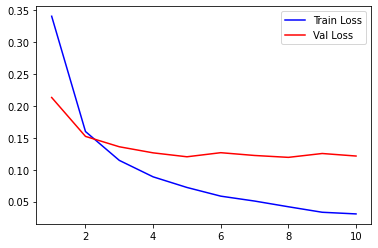

In [65]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)

plt.plot(epochs, loss,'b',label='Train Loss')
plt.plot(epochs, val_loss,'r',label='Val Loss')
plt.legend()
plt.show()

In [66]:
# Step 5: Evaluate the Model
loss,accuracy = model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0962 - accuracy: 0.9744


In [67]:
loss,accuracy

(0.09615635871887207, 0.974399983882904)

In [0]:
# Step 6: Save the Model
model.save('mnist_nn.h5')

### Predict batch images

In [70]:
y_pred = model.predict(x_test)
y_pred

array([[1.2909828e-07, 6.9180751e-11, 2.7881974e-06, ..., 9.9999428e-01,
        7.0785511e-08, 3.5568352e-08],
       [5.1763285e-11, 1.0620570e-06, 9.9999750e-01, ..., 1.6090503e-12,
        3.8482799e-09, 1.6984298e-12],
       [5.0254613e-08, 9.9954259e-01, 8.3434017e-05, ..., 1.0072360e-04,
        3.2108448e-05, 4.6211079e-07],
       ...,
       [3.6557452e-10, 1.2552030e-11, 1.8941370e-12, ..., 5.1125102e-07,
        2.6832549e-07, 9.6113047e-07],
       [6.4327044e-11, 4.5286178e-10, 5.4497961e-14, ..., 4.8195758e-10,
        5.3397453e-05, 9.4167133e-13],
       [1.4870631e-11, 2.1879430e-17, 2.5904040e-13, ..., 2.0244037e-14,
        9.3364845e-13, 6.0392303e-12]], dtype=float32)

In [71]:
y_pred.argmax(axis = 1)

array([7, 2, 1, ..., 4, 5, 6])

### Predict Single Image

In [0]:
x_single = x_test[0]

In [76]:
x_single.shape

(28, 28)

In [0]:
# pred = model.predict(x_single)

In [0]:
import numpy as np
x_single = np.expand_dims(x_single, 0)

In [83]:
x_single.shape

(1, 28, 28)

In [0]:
pred = model.predict(x_single)

In [85]:
pred

array([[1.2909828e-07, 6.9180751e-11, 2.7881920e-06, 2.7914671e-06,
        5.7256230e-15, 3.5042336e-10, 1.3296478e-15, 9.9999428e-01,
        7.0785369e-08, 3.5568281e-08]], dtype=float32)

In [86]:
pred.argmax(axis=1)

array([7])

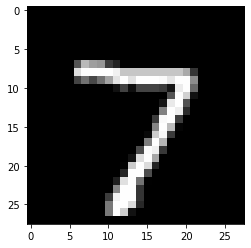

In [88]:
import matplotlib.pyplot as plt
plt.imshow(x_test[0], cmap='gray')